In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
SELECT expert_requests.request_complete, 
expert_requests.expert_options_sent, 
expert_requests.request_complete - expert_requests.expert_options_sent as "Period"
FROM expert_requests
WHERE 
(overall_status = '2nd Round Needed' OR
overall_status = 'PCB Sent to Experts' OR
overall_status = 'Sent to Strategist' OR
overall_status = 'Strategist x Expert Connection' OR 
overall_status = 'HOLD' OR 
overall_status = 'Request Complete')
AND
pcb_email_sent IS NOT NULL
ORDER BY 2
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)


   request_complete pcb_email_sent  Period
0              None     2022-06-14     NaN
1        2022-07-25     2022-06-15    40.0
2              None     2022-06-15     NaN
3        2022-06-21     2022-06-15     6.0
4        2022-06-30     2022-06-16    14.0
5              None     2022-06-16     NaN
6        2022-06-29     2022-06-17    12.0
7        2022-06-30     2022-06-17    13.0
8              None     2022-06-21     NaN
9              None     2022-06-23     NaN
10             None     2022-06-24     NaN
11             None     2022-06-24     NaN
12             None     2022-06-28     NaN
13             None     2022-06-28     NaN
14       2022-07-28     2022-06-30    28.0
15             None     2022-07-06     NaN
16       2022-07-18     2022-07-07    11.0
17       2022-07-12     2022-07-07     5.0
18       2022-07-15     2022-07-07     8.0
19             None     2022-07-08     NaN
20       2022-07-28     2022-07-08    20.0
21       2022-07-28     2022-07-08    20.0
22       20

   Period in Days  Number of Experts
0               0                 27
1               1                 13
2               2                  1
3               3                  1
4               5                  3
5               6                  1
6              11                  1
7              13                  1
8              21                  1


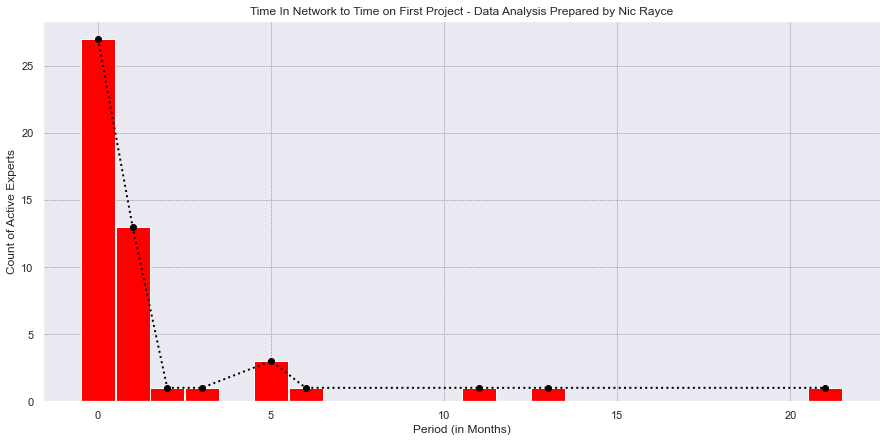

In [22]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT expert_requests.request_complete, 
expert_requests.expert_options_sent, 
expert_requests.request_complete - expert_requests.expert_options_sent as "Period"
FROM expert_requests
WHERE 
(overall_status = '2nd Round Needed' OR
overall_status = 'PCB Sent to Experts' OR
overall_status = 'Sent to Strategist' OR
overall_status = 'Strategist x Expert Connection' OR 
overall_status = 'HOLD' OR 
overall_status = 'Request Complete')
AND
pcb_email_sent IS NOT NULL)

SELECT original."Period" as "Period in Days", count(*) as "Number of Experts"
FROM original
WHERE original."Period" >= 0
GROUP BY 1
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

# Define Data
xdata=df5['Period in Days']
ydata=df5['Number of Experts']
y_error=2

# Plot
plt.figure(figsize=(15, 7))
plt.bar(xdata,ydata, color = 'red' ,width = 0.98)
plt.plot(xdata, ydata, 'o', linestyle = 'dotted', color ='black', linewidth=2)
plt.title("Time In Network to Time on First Project - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Period (in Months)')
plt.ylabel('Count of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.show()

    Period in Days  Number of Experts Requests
0                0                           1
1                2                           1
2                4                           3
3                5                           1
4                7                           1
5                8                           1
6                9                           2
7               11                           1
8               13                           1
9               16                           1
10              17                           1
11              20                           1
12              27                           1
13              39                           1


C:\Users\Nik Harith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nik Harith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


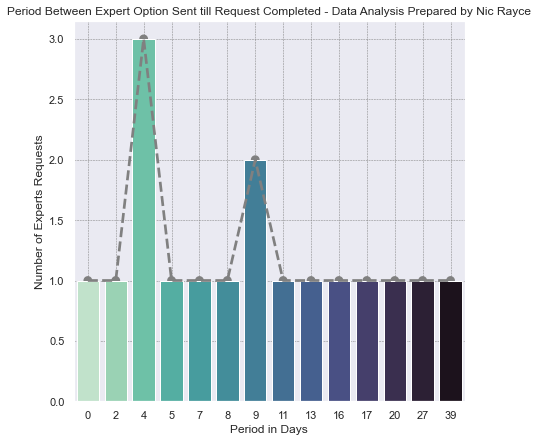

In [18]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
WITH original as
(SELECT expert_requests.request_complete, 
expert_requests.expert_options_sent, 
expert_requests.request_complete - expert_requests.expert_options_sent as "Period"
FROM expert_requests
WHERE 
(overall_status = '2nd Round Needed' OR
overall_status = 'PCB Sent to Experts' OR
overall_status = 'Sent to Strategist' OR
overall_status = 'Strategist x Expert Connection' OR 
overall_status = 'HOLD' OR 
overall_status = 'Request Complete')
AND
pcb_email_sent IS NOT NULL)

SELECT original."Period" as "Period in Days", count(*) as "Number of Experts Requests"
FROM original
WHERE original."Period" >= 0
GROUP BY 1
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

# Define Data
xdata=df5['Period in Days']
ydata=df5['Number of Experts Requests']
y_error=2

# Plot
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("Period Between Expert Option Sent till Request Completed - Data Analysis Prepared by Nic Rayce")
sns.barplot(xdata, ydata, palette='mako_r')
sns.pointplot(xdata, ydata, markers='o', linestyles='--', color='grey', capsize=None)
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

    Period
0     17.0
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8     20.0
9      4.0
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     9.0
17     NaN
18     NaN
19     NaN
20    27.0
21     NaN
22     NaN
23     2.0
24     NaN
25     4.0
26     9.0
27     NaN
28     NaN
29    11.0
30     NaN
31     5.0
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37    16.0
38     NaN
39     4.0
40     7.0
41    13.0
42    39.0
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     0.0
50     NaN
51     NaN
52     NaN
53     NaN
54     8.0
55     NaN


C:\Users\Nik Harith\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


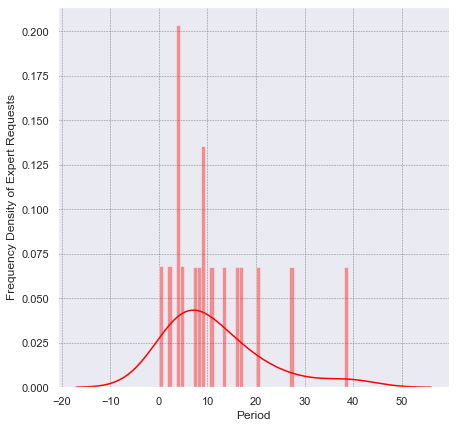

In [17]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
SELECT  
expert_requests.request_complete - expert_requests.expert_options_sent as "Period"
FROM expert_requests
WHERE 
(overall_status = '2nd Round Needed' OR
overall_status = 'PCB Sent to Experts' OR
overall_status = 'Sent to Strategist' OR
overall_status = 'Strategist x Expert Connection' OR 
overall_status = 'HOLD' OR 
overall_status = 'Request Complete')
AND
pcb_email_sent IS NOT NULL
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

# Define Data
xdata=df5['Period']
y_error=2

# Plot
import seaborn as sns, numpy as np
plt.figure(figsize=(7,7))
plt.xlabel('nth Day')
plt.ylabel('Frequency Density of Expert Requests') 
sns.set_theme(); np.random.seed(0)
x = xdata
ax = sns.distplot(x, color="red", bins=45)
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

                                                   Count
major_category minor_category                           
Active         Ad Creative                             1
               Advertising                            10
               Amazon                                  4
               Community / Social Media                1
               Copywriter                              5
               Copywriting                             4
               Development & Product-Build             5
               Email                                   7
               Google Ads                              2
               Graphic Design                          5
               Influencer Management                   1
               Photography                             2
               Product Marketing                       1
               Public Relations                        1
               SEO                                     7
               Social Media    

([<matplotlib.patches.Wedge at 0x179c4bdc160>,
 [Text(0.7698438663142632, 0.015505531216530841, ''),
  Text(0.7476251972199756, 0.18427307041939858, ''),
  Text(0.66683955152696, 0.3850000162588607, ''),
  Text(0.6247609241237756, 0.4500819788527486, ''),
  Text(0.5659543228797633, 0.5221069856013312, ''),
  Text(0.4625715198185625, 0.6155709455885204, ''),
  Text(0.34403478655493996, 0.6888686853385751, ''),
  Text(0.16918068711414805, 0.7511843283160164, ''),
  Text(0.03100472926695248, 0.769375530390123, ''),
  Text(-0.07740199492301651, 0.7660998180276102, ''),
  Text(-0.16918078052244295, 0.7511843072787243, ''),
  Text(-0.2142274997052138, 0.7395989307523725, ''),
  Text(-0.2584925259534338, 0.7253148378643672, ''),
  Text(-0.287488372239291, 0.7143181614849247, ''),
  Text(-0.3983501668960814, 0.6589515494585806, ''),
  Text(-0.5221070137514541, 0.5659542969105711, ''),
  Text(-0.5659543832199397, 0.5221069201936875, ''),
  Text(-0.5964458618543601, 0.48698288868995143, ''),
  T

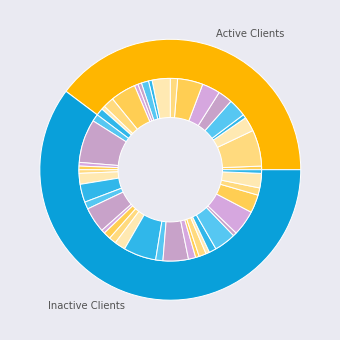

In [56]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query = """
SELECT 
COUNT (*) as "Count",
CASE WHEN "source"."overall_status" like 'Request Complete' 
THEN 'Active' ELSE 'Inactive' END  AS "major_category", 
"source"."Specialty" AS "minor_category"
FROM 
(SELECT
clients.company,
specialties.name as "Specialty",
expert_requests.request_id,
expert_requests.overall_status
FROM 
clients 
LEFT JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active') "source"
GROUP BY 2, 3
"""
dataset = sqlio.read_sql_query(query,conn)
df = pd.DataFrame(data=dataset)
pivot = pd.pivot_table(data=df, index='minor_category', columns='major_category', values='Count', fill_value=0).sort_values(by=['minor_category'])
df = df.pivot_table('Count', ['major_category', 'minor_category'])
df.to_csv('analysis24.csv')
print(df)

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Active Clients', 'Inactive Clients']
size = 0.3
vals = df['Count']
# Major category values = sum of minor category values
group_sum = df.groupby('major_category')['Count'].sum()

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

outer_colors = ['#FFB600', '#09A0DA','#8464a0']
inner_colors = ['#FFCE53', '#FFDA7E', '#FFE9B2', '#30B7EA', '#56C7F2', '#C8A2C9', '#D6A7DF']

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, 
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

In [72]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install colour